# Notebook reviews data exploration leading to feature engineering scripts
Only leverages the train data in order to maintain rigor. 

In [45]:
#import pandas libs
import pandas as pd
import seaborn as sns
import os
import sys
import category_encoders as ce

#Autoreload for other py files
%load_ext autoreload
%autoreload 2

#Import local libs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import src.features.feat_eng as feat_eng

#Extend the range of pandas colmns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
#Load in data
data_loc = "../Data/interim/"
train_df = pd.read_csv(data_loc + "test.csv", index_col="building_id")

#Run Feature Engineering
feat_df = feat_eng.rf_features(train_df, "damage_grade", ["geo_level_2_id", "geo_level_3_id"], ["geo_level_1_id"])

#Add back in dependent

feat_df.head()

Drop from: land_surface_condition if less than : 0.06666666666666667
No items to change
Drop from: foundation_type if less than : 0.04000000000000001
Replacing 2 of 5
Drop from: roof_type if less than : 0.06666666666666667
No items to change
Drop from: ground_floor_type if less than : 0.04000000000000001
Replacing 2 of 5
Drop from: other_floor_type if less than : 0.05
No items to change
Drop from: position if less than : 0.05
Replacing 2 of 4
Drop from: plan_configuration if less than : 0.020000000000000004
Replacing 8 of 10
Drop from: legal_ownership_status if less than : 0.05
Replacing 3 of 4
Drop from: has_secondary_use if less than : 0.015384615384615385
Replacing 8 of 13
Drop from: has_superstructure if less than : 0.0007843137254901962
Replacing 201 of 255
Drop from: geo_level_1_id if less than : 0.0064516129032258064
Replacing 7 of 31
Use Binary Encoder on  has_superstructure
Use Binary Encoder on  geo_level_1_id


,geo_level_1_id_0,geo_level_1_id_1,geo_level_1_id_2,geo_level_1_id_3,geo_level_1_id_4,geo_level_1_id_5,count_floors_pre_eq,age,area_percentage,height_percentage,count_families,damage_grade,has_secondary_use_count,has_superstructure_count,has_superstructure_0,has_superstructure_1,has_superstructure_2,has_superstructure_3,has_superstructure_4,has_superstructure_5,has_superstructure_6,has_superstructure_7,other_floor_type_j,other_floor_type_q,other_floor_type_s,...,legal_ownership_status_other,legal_ownership_status_v,foundation_type_other,foundation_type_r,foundation_type_u,foundation_type_w,ground_floor_type_f,ground_floor_type_other,ground_floor_type_v,ground_floor_type_x,roof_type_n,roof_type_q,roof_type_x,has_secondary_use_has_secondary_use_agriculture,"has_secondary_use_has_secondary_use_agriculture, has_secondary_use_other",has_secondary_use_has_secondary_use_hotel,has_secondary_use_has_secondary_use_other,has_secondary_use_has_secondary_use_rental,has_secondary_use_nan,has_secondary_use_other,plan_configuration_d,plan_configuration_other,plan_configuration_q,age_groups,slenderness
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
350225,0,0,0,0,0,1,2,0,8,6,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0.250000
692390,0,0,0,0,1,0,4,10,5,12,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,...,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0.800000
270940,0,0,0,0,1,1,2,10,5,5,1,2,0,1,0,0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0.400000
648049,0,0,0,1,0,0,2,30,8,6,1,3,0,1,0,0,0,0,0,0,0,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0.250000
796381,0,0,0,1,0,1,1,0,6,2,1,2,0,1,0,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0.166667


In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = feat_df
X = data.drop("damage_grade", axis=1) #independent columns
y = data["damage_grade"]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                    Specs         Score
7                     age  12420.662429
39    ground_floor_type_v   3171.627144
33  foundation_type_other   2626.264727
43            roof_type_x   2613.976036
23     other_floor_type_s   1750.258633
8         area_percentage   1035.797552
2        geo_level_1_id_2    990.134791
36      foundation_type_w    837.600014
21     other_floor_type_j    725.725175
54             age_groups    695.224990


/Users/z/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.00000000e+00 2.66642769e-02 4.10714898e-02 3.38492635e-02
 3.82410375e-02 2.84257803e-02 2.52232233e-02 1.23981972e-01
 9.91062418e-02 9.69421150e-02 3.42722524e-02 6.21446875e-03
 1.60958201e-02 0.00000000e+00 8.74349799e-05 6.43310829e-03
 1.21895747e-02 1.18430602e-02 1.37128135e-02 1.15902946e-02
 9.27275181e-03 6.23640809e-03 1.25323555e-02 3.99901765e-03
 1.00210814e-02 5.88843650e-03 1.05755494e-02 9.93791764e-03
 1.16039874e-02 6.00830913e-03 1.33250608e-02 5.15086209e-03
 5.23789257e-03 5.43188149e-03 1.75857406e-02 4.35061597e-03
 4.42818398e-03 9.89827156e-03 1.16813877e-03 1.25038562e-02
 7.31371649e-03 1.04796080e-02 9.95640475e-03 9.87193640e-03
 4.17863802e-03 3.69867325e-04 3.93244652e-03 7.57419321e-04
 1.53166698e-03 6.74326962e-03 8.91615963e-04 5.71214590e-03
 3.67647208e-03 3.89097157e-03 4.03264687e-02 9.92668063e-02]


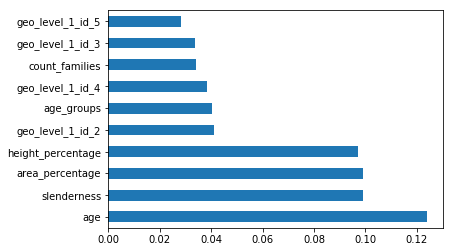

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
import scipy
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

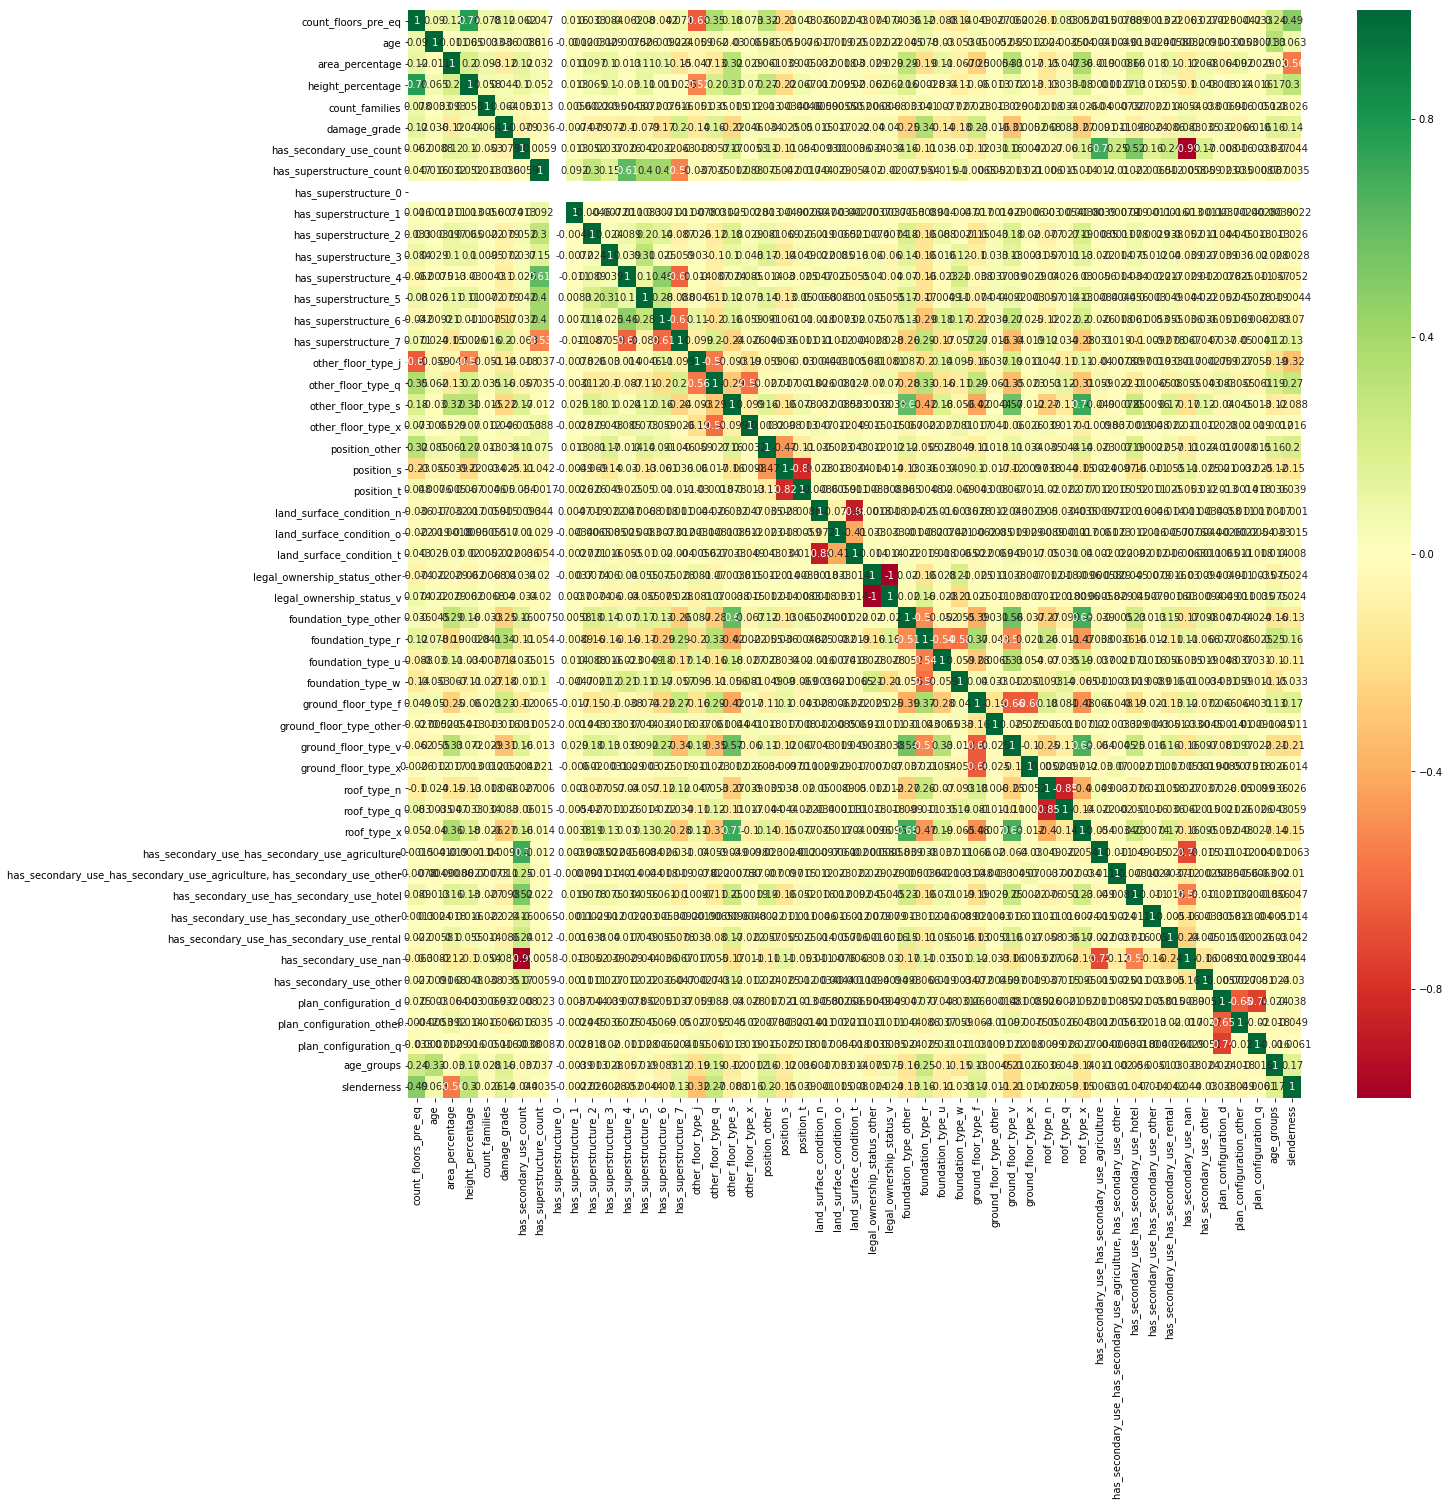

In [22]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [79]:
#Load in data
data_loc = "../Data/interim/"
train_df = pd.read_csv(data_loc + "test.csv", index_col="building_id")
submit_df = pd.read_csv(data_loc + "submit_vals.csv", index_col="building_id")
train_df.drop("damage_grade", axis=1, inplace=True)

In [80]:
for col in train_df.columns:
    hold = (train_df[col].value_counts()/train_df.shape[0]) - (submit_df[col].value_counts()/submit_df.shape[0])
    for item in hold:
        if abs(item) > .05:
            print(hold)

In [59]:
train_df["geo_level_1_id_3"].value_counts()/train_df.shape[0]

0    0.673535
1    0.326465
Name: geo_level_1_id_3, dtype: float64

In [61]:
submit_df["geo_level_1_id_3"].value_counts()/submit_df.shape[0]

0    1.0
Name: geo_level_1_id_3, dtype: float64

In [62]:
submit_df["geo_level_1_id_3"].value_counts()

0    86868
Name: geo_level_1_id_3, dtype: int64

In [70]:
submit_df.head()

,geo_level_1_id_0,geo_level_1_id_1,geo_level_1_id_2,geo_level_1_id_3,geo_level_1_id_4,geo_level_1_id_5,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,...,foundation_type_w,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,position_other,position_s,position_t,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,ground_floor_type_f,ground_floor_type_other,ground_floor_type_v,ground_floor_type_x,plan_configuration_d,plan_configuration_other,plan_configuration_q,roof_type_n,roof_type_q,roof_type_x,legal_ownership_status_other,legal_ownership_status_v,age_groups,slenderness
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
300051,0,0,0,0,0,0,3,20,7,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0.428571
99355,0,0,0,0,0,0,2,25,13,5,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0.153846
890251,0,0,0,0,0,0,2,5,4,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0.500000
745817,0,0,0,0,0,0,1,0,19,3,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,...,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0.052632
421793,0,0,0,0,0,0,3,15,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0.375000
